## Some data exploration with `pandas`
* find datasets at: https://datasetsearch.research.google.com/
* see this repo: https://github.com/clownfragment/covid-19-exploration-with-pandas




In [10]:
# imports
import pandas as pd

### COVID-19 data from data.europa.eu
* https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data

In [11]:
# import .csv into a dataframe (df)
df = pd.read_csv('data/2020_04_07__data_europa_eu__covid_19_data.csv')

### Basics of your data
* "object" means it could be a string, some non-numeric value
* `pandas` is going to impute the datatype of the column

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9310 entries, 0 to 9309
Data columns (total 10 columns):
dateRep                    9310 non-null object
day                        9310 non-null int64
month                      9310 non-null int64
year                       9310 non-null int64
cases                      9310 non-null int64
deaths                     9310 non-null int64
countriesAndTerritories    9310 non-null object
geoId                      9286 non-null object
countryterritoryCode       9125 non-null object
popData2018                9172 non-null float64
dtypes: float64(1), int64(5), object(4)
memory usage: 727.4+ KB


In [13]:
# get the dimensions of the dataframe
df.shape

(9310, 10)

In [14]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2018'],
      dtype='object')

In [15]:
# give some brief summary stats
df.describe()

,day,month,year,cases,deaths,popData2018
count,9310.000000,9310.000000,9310.000000,9310.000000,9310.000000,9.172000e+03
mean,15.713426,2.561117,2019.992803,141.459506,7.955532,6.488272e+07
std,9.462419,1.281713,0.084531,1104.270540,66.660811,2.026134e+08
min,1.000000,1.000000,2019.000000,-9.000000,0.000000,1.000000e+03
25%,6.000000,2.000000,2020.000000,0.000000,0.000000,3.731000e+06
50%,16.000000,3.000000,2020.000000,0.000000,0.000000,1.062716e+07
75%,24.000000,3.000000,2020.000000,12.000000,0.000000,4.449450e+07
max,31.000000,12.000000,2020.000000,34272.000000,2004.000000,1.392730e+09


##### be sure these summary stats are meaningful given your data
* ex. the mean of the day, month or year is not helpful
* the mean of the cases is not helpful because different countries
started reporting at different times
* max cases seems helpful
    * does a max case count for a given country in one day make sense as 34,272?

In [16]:
# view top 10 rows
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,07/04/2020,7,4,2020,38,0,Afghanistan,AF,AFG,37172386.0
1,06/04/2020,6,4,2020,29,2,Afghanistan,AF,AFG,37172386.0
2,05/04/2020,5,4,2020,35,1,Afghanistan,AF,AFG,37172386.0
3,04/04/2020,4,4,2020,0,0,Afghanistan,AF,AFG,37172386.0
4,03/04/2020,3,4,2020,43,0,Afghanistan,AF,AFG,37172386.0
5,02/04/2020,2,4,2020,26,0,Afghanistan,AF,AFG,37172386.0
6,01/04/2020,1,4,2020,25,0,Afghanistan,AF,AFG,37172386.0
7,31/03/2020,31,3,2020,27,0,Afghanistan,AF,AFG,37172386.0
8,30/03/2020,30,3,2020,8,1,Afghanistan,AF,AFG,37172386.0
9,29/03/2020,29,3,2020,15,1,Afghanistan,AF,AFG,37172386.0


#### Notes
* it looks like this data is in alphabetical order
    * secondarily, it looks like it's in reverse chronological order
* daily reports of cases and deaths per country

In [17]:
# view last 10 rows
df.tail(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
9300,30/03/2020,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9301,29/03/2020,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0
9302,28/03/2020,28,3,2020,2,0,Zimbabwe,ZW,ZWE,14439018.0
9303,27/03/2020,27,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9304,26/03/2020,26,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
9305,25/03/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9306,24/03/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
9307,23/03/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
9308,22/03/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0
9309,21/03/2020,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


##### When does it seem that the EU started getting reporting on COVID-19 from Zimbabwe?
- it looks like March 21, 2020

### Dump the dataframe to an excel spreadsheet

In [19]:
df.to_excel('data/2020_04_07__data_europa_eu__covid_19_data.xls')

<br><br><br>
## Notation Methods

In [20]:
# dot notation
df.dateRep.head()

0    07/04/2020
1    06/04/2020
2    05/04/2020
3    04/04/2020
4    03/04/2020
Name: dateRep, dtype: object

In [21]:
# bracket notation
df['dateRep'].head()

0    07/04/2020
1    06/04/2020
2    05/04/2020
3    04/04/2020
4    03/04/2020
Name: dateRep, dtype: object

In [22]:
df['dateRep'].describe()

count           9310
unique            99
top       07/04/2020
freq             203
Name: dateRep, dtype: object

##### How many unique countries have reported?

In [23]:
df['countriesAndTerritories'].describe()

count            9310
unique            204
top       Switzerland
freq               99
Name: countriesAndTerritories, dtype: object

##### What are the unique countries that have reported?

In [24]:
num_countries_reported = len(df["countriesAndTerritories"].unique())
print(f'{num_countries_reported} countries have reported')

for country_name in df['countriesAndTerritories'].unique():
    print('  ',country_name)

204 countries have reported
   Afghanistan
   Albania
   Andorra
   Algeria
   Angola
   Anguilla
   Antigua_and_Barbuda
   Argentina
   Armenia
   Aruba
   Australia
   Austria
   Azerbaijan
   Bahamas
   Bahrain
   Bangladesh
   Barbados
   Belarus
   Belgium
   Belize
   Benin
   Bermuda
   Bhutan
   Bolivia
   Bonaire, Saint Eustatius and Saba
   Bosnia_and_Herzegovina
   Botswana
   Brazil
   British_Virgin_Islands
   Brunei_Darussalam
   Bulgaria
   Burkina_Faso
   Burundi
   Cambodia
   Cameroon
   Canada
   Cape_Verde
   Cases_on_an_international_conveyance_Japan
   Cayman_Islands
   Central_African_Republic
   Chad
   Chile
   China
   Colombia
   Congo
   Costa_Rica
   Cote_dIvoire
   Croatia
   Cuba
   Curaçao
   Cyprus
   Czechia
   Democratic_Republic_of_the_Congo
   Denmark
   Djibouti
   Dominica
   Dominican_Republic
   Ecuador
   Egypt
   El_Salvador
   Equatorial_Guinea
   Eritrea
   Estonia
   Eswatini
   Ethiopia
   Falkland_Islands_(Malvinas)
   Faroe_Islands
   Fi

<br><br><br>
### Slice notation for dataframes
* `.loc`: access a slice of rows
    * is inclusive
* slice notation `[:]`
    * exclusive of the higher bound
* `.iloc`

In [25]:
df[300:310]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
300,24/03/2020,24,3,2020,35,0,Argentina,AR,ARG,44494502.0
301,23/03/2020,23,3,2020,41,0,Argentina,AR,ARG,44494502.0
302,22/03/2020,22,3,2020,67,1,Argentina,AR,ARG,44494502.0
303,21/03/2020,21,3,2020,30,0,Argentina,AR,ARG,44494502.0
304,20/03/2020,20,3,2020,31,1,Argentina,AR,ARG,44494502.0
305,19/03/2020,19,3,2020,18,0,Argentina,AR,ARG,44494502.0
306,18/03/2020,18,3,2020,14,0,Argentina,AR,ARG,44494502.0
307,17/03/2020,17,3,2020,9,0,Argentina,AR,ARG,44494502.0
308,16/03/2020,16,3,2020,11,0,Argentina,AR,ARG,44494502.0
309,15/03/2020,15,3,2020,11,0,Argentina,AR,ARG,44494502.0


In [26]:
df.loc[300:310, ['countriesAndTerritories','cases','deaths']]

,countriesAndTerritories,cases,deaths
300,Argentina,35,0
301,Argentina,41,0
302,Argentina,67,1
303,Argentina,30,0
304,Argentina,31,1
305,Argentina,18,0
306,Argentina,14,0
307,Argentina,9,0
308,Argentina,11,0
309,Argentina,11,0


### Masking/Filtering

In [27]:
# creates a mask where all countries not Peru are set to False
peru_mask = df['countriesAndTerritories'] == 'Peru'

In [28]:
peru_mask.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: countriesAndTerritories, dtype: bool

In [29]:
df_peru = df[df['countriesAndTerritories'] == 'Peru']

In [30]:
# how many times has peru reported?
len(df_peru)

31

In [31]:
df_peru.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
6846,07/04/2020,7,4,2020,280,9,Peru,PE,PER,31989256.0
6847,06/04/2020,6,4,2020,535,10,Peru,PE,PER,31989256.0
6848,05/04/2020,5,4,2020,151,12,Peru,PE,PER,31989256.0
6849,04/04/2020,4,4,2020,181,6,Peru,PE,PER,31989256.0
6850,03/04/2020,3,4,2020,91,8,Peru,PE,PER,31989256.0


In [32]:
df_peru.cases.describe()

count     31.000000
mean      82.612903
std      112.906651
min        1.000000
25%       15.500000
50%       32.000000
75%      106.500000
max      535.000000
Name: cases, dtype: float64

In [33]:
df_peru.deaths.describe()

count    31.000000
mean      2.967742
std       4.324225
min       0.000000
25%       0.000000
50%       1.000000
75%       5.500000
max      17.000000
Name: deaths, dtype: float64

##### Plot daily cases and deaths in Peru

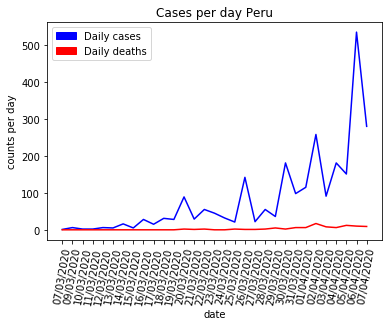

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

cases_peru = df_peru['cases'][::-1]
deaths_peru = df_peru['deaths'][::-1]
dates_peru = df_peru['dateRep'][::-1]

cases_peru_plot = plt.plot(list(dates_peru), list(cases_peru), color='blue')
deaths_peru_plot = plt.plot(list(dates_peru), list(deaths_peru), color='red')
plt.ylabel('counts per day')
plt.xlabel('date')
plt.xticks(rotation=80)
plt.title('Cases per day Peru')
blue = mpatches.Patch(color='blue', label='Daily cases')
red  = mpatches.Patch(color='red', label='Daily deaths')
plt.legend(handles=[blue, red])

plt.show()

<br><br><br>
#### Abstract plot to function

In [44]:
def plot_daily_cases_deaths(df_to_check, country):
    df_country = df_to_check[df_to_check['countriesAndTerritories'] == country]
    
    
    
    cases_country = df_country['cases'][::-1]
    deaths_country = df_country['deaths'][::-1]
    dates_country = list(df_country['dateRep'][::-1])
    max_deaths = max(deaths_country)
    max_cases = max(cases_country)
    
    cases_country_plot = plt.plot(list(dates_country), list(cases_country), color='blue')
    deaths_country_plot = plt.plot(list(dates_country), list(deaths_country), color='red')
    plt.ylabel('counts per day')
    plt.xlabel('date')
    plt.xticks(rotation=80)
    
    plt.title(f'max cases in 1 day: {max_cases}, max deaths in 1 day: {max_deaths}')
    plt.suptitle(f'{country}: COVID-19 Reporting to EU Open Data', fontsize=14)
    blue = mpatches.Patch(color='blue', label='Daily cases')
    red  = mpatches.Patch(color='red', label='Daily deaths')
    plt.legend(handles=[blue, red])

    plt.show()
    


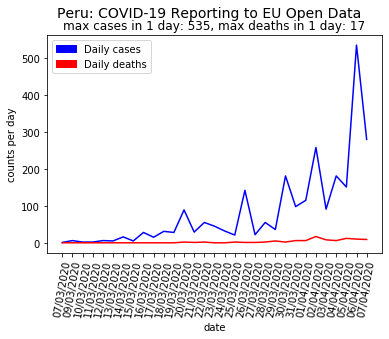

In [45]:
plot_daily_cases_deaths(df, 'Peru')

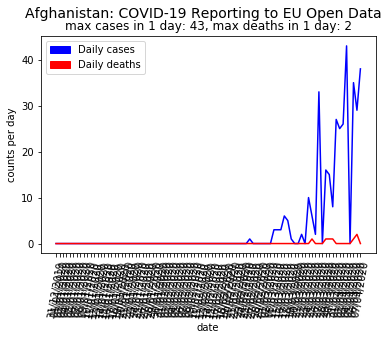

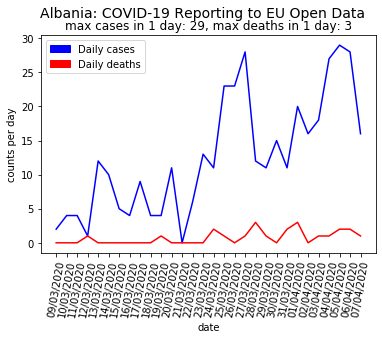

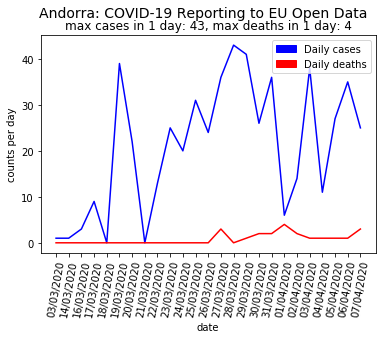

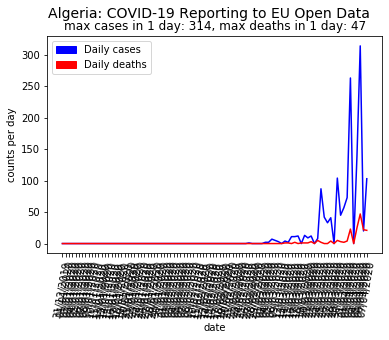

In [ ]:
for country_name in df['countriesAndTerritories'].unique():
    plot_daily_cases_deaths(df, country_name)
